In [13]:
%pip install -q matplotlib
%pip install -q line_profiler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%load_ext line_profiler

In [15]:
import matplotlib.pyplot as plt
import statistics as stats 

In [3]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [4]:
friendships = [(0, 1), (0, 2), (1, 2),
(1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [5]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"), (2,
"numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"), (3,
"statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"), (4,
"libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"), (5, "Haskell"),
(5, "programming languages"), (6, "statistics"), (6, "probability"), (6,
"mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"), (8,
"Big Data"), (8, "artificial intelligence"), (9, "Hadoop"), (9, "Java"), (9,
"MapReduce"), (9, "Big Data")
]

In [7]:
grouped = {}

for person,like in interests:
    if like not in grouped:
        grouped[like] = []
    grouped[like].append(person)


for like in grouped:
    if len(grouped[like]) > 1:
        nomes = [users[p]["name"] for p in grouped[like]]

        if len(nomes) == 2:
            nomes_str = f'{nomes[0]} e {nomes[1]}'
        else:
            nomes_str = ', '.join(nomes[:-1]) + f'e {nomes[-1]}'

        print(f'Os usuários {nomes_str} gostam de {like}.')
        


Os usuários Hero e Klein gostam de Hadoop.
Os usuários Hero, Katee Klein gostam de Big Data.
Os usuários Hero e Dunn gostam de HBase.
Os usuários Hero, Clivee Klein gostam de Java.
Os usuários Hero e Dunn gostam de Cassandra.
Os usuários Sue, Chie Clive gostam de Python.
Os usuários Sue e Devin gostam de scikit-learn.
Os usuários Chi e Clive gostam de R.
Os usuários Chi e Hicks gostam de statistics.
Os usuários Chi e Thor gostam de regression.
Os usuários Chi e Hicks gostam de probability.
Os usuários Thor e Devin gostam de machine learning.
Os usuários Devin e Kate gostam de neural networks.


In [11]:
%%prun

# 1️⃣ Inicializa todos com lista vazia
for user in users:
    user["friends"] = []

# 2️⃣ Adiciona amizades em ambos os lados
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

print("--"*20)
print("Lista de Amizades:")
print("--"*20)

# 3️⃣ Exibe
for user in users:
    print(f"{user['name']}: {[friend['name'] for friend in user['friends']]}")


# --- amigos do amigo (FoF) ---
for user in users:
    direct_ids = {f["id"] for f in user["friends"]}   # ids dos amigos diretos
    fof_ids = set()                                    # usar set para não duplicar

    for friend in user["friends"]:
        for fof in friend["friends"]:
            # não pode ser o próprio user e nem um amig"o direto
            if fof["id"] != user["id"] and fof["id"] not in direct_ids:
                fof_ids.add(fof["id"])

    # guarda como lista de dicts (mesmo formato dos users)
    user["fof"] = [users[k] for k in sorted(fof_ids)]

print("--"*20)
print("Lista de amigos de amigos:")
print("--"*20)
for user in users:
    print(f"{user['name']}: {[p['name'] for p in user['fof']]}")




----------------------------------------
Lista de Amizades:
----------------------------------------
Hero: ['Dunn', 'Sue']
Dunn: ['Hero', 'Sue', 'Chi']
Sue: ['Hero', 'Dunn', 'Chi']
Chi: ['Dunn', 'Sue', 'Thor']
Thor: ['Chi', 'Clive']
Clive: ['Thor', 'Hicks', 'Devin']
Hicks: ['Clive', 'Kate']
Devin: ['Clive', 'Kate']
Kate: ['Hicks', 'Devin', 'Klein']
Klein: ['Kate']
----------------------------------------
Lista de amigos de amigos:
----------------------------------------
Hero: ['Chi']
Dunn: ['Thor']
Sue: ['Thor']
Chi: ['Hero', 'Clive']
Thor: ['Dunn', 'Sue', 'Hicks', 'Devin']
Clive: ['Chi', 'Kate']
Hicks: ['Thor', 'Devin', 'Klein']
Devin: ['Thor', 'Hicks', 'Klein']
Kate: ['Clive']
Klein: ['Hicks', 'Devin']
 

         669 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
       52    0.000    0.000    0.000    0.000 iostream.py:655(write)
        1    0.000    0.000    0.000    0.000 socket.py:626(send)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
       26    0.000    0.000    0.000    0.000 {built-in method builtins.print}
       52    0.000    0.000    0.000    0.000 iostream.py:550(_is_master_process)
       52    0.000    0.000    0.000    0.000 iostream.py:505(parent_header)
       52    0.000    0.000    0.000    0.000 {method 'write' of '_io.StringIO' objects}
       52    0.000    0.000    0.000    0.000 iostream.py:577(_schedule_flush)
       52    0.000    0.000    0.000    0.000 {method 'items' of 'dict'

In [6]:
for user in users:
    user["inte"] = []

for i,j in interests:
    users[i]["inte"].append(j)

for user in users:
    interesses_str = ", ".join(user["inte"])
    print(f"O trabalhador {user["name"]} gosta de: {interesses_str}")



O trabalhador Hero gosta de: Hadoop, Big Data, HBase, Java, Spark, Storm, Cassandra
O trabalhador Dunn gosta de: NoSQL, MongoDB, Cassandra, HBase, Postgres
O trabalhador Sue gosta de: Python, scikit-learn, scipy, numpy, statsmodels, pandas
O trabalhador Chi gosta de: R, Python, statistics, regression, probability
O trabalhador Thor gosta de: machine learning, regression, decision trees, libsvm
O trabalhador Clive gosta de: Python, R, Java, C++, Haskell, programming languages
O trabalhador Hicks gosta de: statistics, probability, mathematics, theory
O trabalhador Devin gosta de: machine learning, scikit-learn, Mahout, neural networks
O trabalhador Kate gosta de: neural networks, deep learning, Big Data, artificial intelligence
O trabalhador Klein gosta de: Hadoop, Java, MapReduce, Big Data


[2, 3, 3, 3, 2, 3, 2, 2, 3, 1]
['Hero', 'Dunn', 'Sue', 'Chi', 'Thor', 'Clive', 'Hicks', 'Devin', 'Kate', 'Klein']


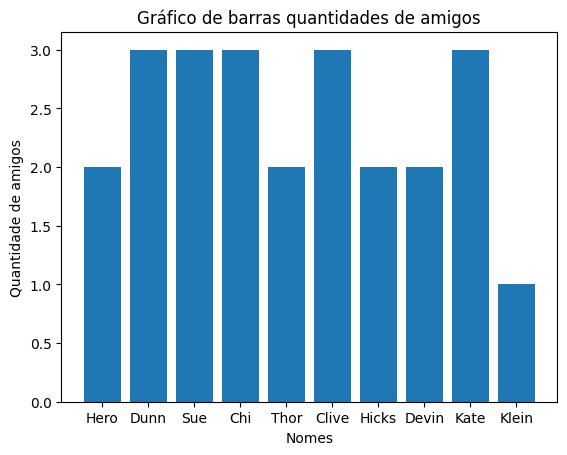

In [9]:
list_of_num = []
list_of_name = []

for user in users:
    num = len(user["friends"])
    list_of_num.append(num)
    name = user["name"]
    list_of_name.append(name)

print(list_of_num)
print(list_of_name)

plt.bar(list_of_name, list_of_num)

plt.title('Gráfico de barras quantidades de amigos')
plt.xlabel('Nomes')
plt.ylabel('Quantidade de amigos')

plt.show()

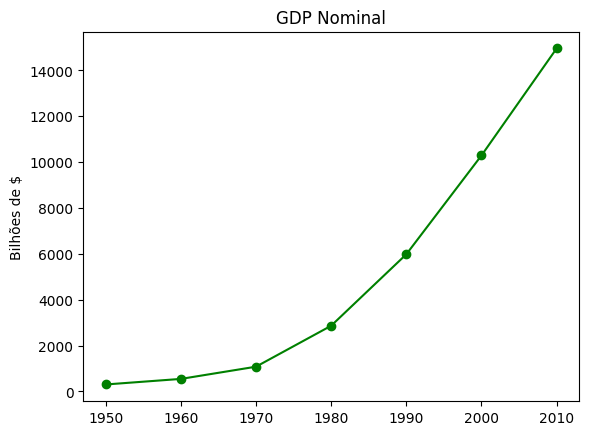

In [10]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]


plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 
plt.title("GDP Nominal")
plt.ylabel("Bilhões de $")
plt.show()

USANDO BIBLIOTECAS
------------------------------------------------------------
Moda: 83000
Mediana: 72500.0
Media: 69400.0
------------------------------------------------------------
USANDO PYTHON PURO
69400.0
72500.0
[83000, 48000, 76000]
 

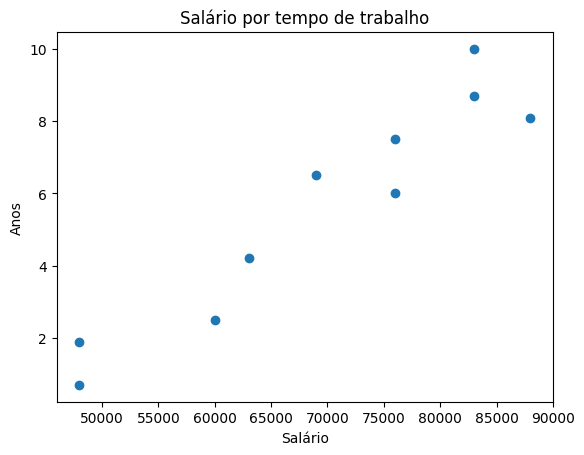

         47391 function calls (46733 primitive calls) in 0.072 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.007    0.007 {built-in method _imp.create_dynamic}
        1    0.004    0.004    0.004    0.004 {built-in method _imp.exec_dynamic}
        5    0.003    0.001    0.003    0.001 {built-in method _io.open_code}
        5    0.003    0.001    0.003    0.001 {method 'read' of '_io.BufferedReader' objects}
       25    0.003    0.000    0.003    0.000 {built-in method nt.stat}
       10    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.002    0.002    0.002    0.002 {built-in method matplotlib._path.update_path_extents}
        1    0.002    0.002    0.008    0.008 font_manager.py:1453(_findfont_cached)
        1    0.001    0.001    0.001    0.001 {built-in method nt._path_isfile}
        4    0.001    0.000    0.003    0.001 base_events.py:

In [ ]:

import statistics as stats 

salaries_and_tenures = [
(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)
]

salaries, tenures = zip(*salaries_and_tenures)


print("USANDO BIBLIOTECAS")
print("--"*30)
media = sum(salaries)/len(salaries)
mediana = stats.median(salaries)
try:
    moda = stats.mode(salaries)
except stats.StatisticsError:
    mode = "Sem moda única"

print("Moda:",moda)
print("Mediana:",mediana)
print("Media:",media)
print("--"*30)

print("USANDO PYTHON PURO")
"""
A média é a mais simples das três
"""
media = sum(salaries)/len(salaries)
print(media)

"""
Para encontrar a mediana primeiro precisaremos de ordenar os valores usamos a função sorted.
Depois fazemos algumas operações lógicas , se o resto da divisão da quantidade de termos por dois der 1 , quer dizer que a quantidade de termos é ímpar,
repartimos por dois Ex: 5//2 = 2 , o termo de índece 2 é o central devido ao fato de os termos em uma lista começarem no termo 0.
E se o resto da divisão da quantidade de termos por dois der 0 , então a quantidade de valores é par , nós pegamos os dois valores centrais e fazemos sua média
que no caso é o n//2 e o n//2 -1, por que termo da lista começa no 0.
"""

ordenados = sorted(salaries)
n = len(ordenados)

if n % 2 == 1:
    mediana = ordenados[n // 2]
else:
    meio1 = ordenados[n // 2]
    meio2 = ordenados[n // 2 - 1]
    mediana = (meio1 + meio2)/2

print(mediana)
"""
Para encontrar a Moda nós primeiro criamos um dicionário para colocar as chaves e seus valores, percorremos a lista de salários e para cada valor diferente nós adicionamor 1 em seu valor, depois pegamos o valor máximo com a função max(contagem.values()) e fazemos, em seguida, uma comparação das valores, se o valor for igual ao max, ele é uma moda.
"""
contagem = {}
for s in salaries:
    contagem[s] = contagem.get(s,0)+1
max_freq = max(contagem.values())
modas = [k for k,v in contagem.items() if  v == max_freq]

print(modas)



plt.plot(salaries,tenures, 'o')
plt.title('Salário por tempo de trabalho')
plt.xlabel('Salário')
plt.ylabel('Anos')

